In [9]:
%matplotlib inline

import cv2
from matplotlib import pyplot as plt
import numpy as np
from time import time
import dlib

In [2]:
def read_img(path):
    img = cv2.imread(path)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [3]:
def show_img(img):
    plt.imshow(img)
    plt.show()

In [4]:
def find_red(img):
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

    # lower mask (0-10)
    lower_red = np.array([0,50,50])
    upper_red = np.array([10,255,255])
    mask0 = cv2.inRange(img_hsv, lower_red, upper_red)

    # upper mask (170-180)
    lower_red = np.array([160,50,50])
    upper_red = np.array([180,255,255])
    mask1 = cv2.inRange(img_hsv, lower_red, upper_red)

    # join my masks
    mask = mask0+mask1

    output_img = img.copy()
    output_img[np.where(mask==0)] = 0
    output_img[np.where(mask!=0)] = 255

    return output_img

In [16]:
def find_windows(img, oimg):
    oimg = cv2.cvtColor(oimg, cv2.COLOR_RGB2GRAY)
    ret, thresh = cv2.threshold(oimg, 127, 255, 0)
    im2, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area > 100:
            x,y,w,h = cv2.boundingRect(cnt)
            ratio = w / float(h)
            
            if 0.5 <= ratio <= 1.5:
                i = img
                c = 50
                candidate = i[y:y+h, x:x+w]
                print y, y+h, x, x+w
                print "%d:%d, %d:%d" % (y-c, y+h+c, x-c, x+w+c)
                
                #show_img(candidate)
                for d in detector2(candidate):
                    print d
                rec = cv2.rectangle(i,(x,y),(x+w,y+h),(0,255,0),5)
                #show_img(rec)
                print area
                #draw_bb(img, detector2(img))

In [18]:
t = time()
i = read_img("/Users/florian/traffic-signs-dataset/testing/test2.jpg")
oi = find_red(i)
find_windows(i, oi)
print time() - t

283 335 139 197
233:385, 89:247
1617.5
0.0512108802795


In [11]:
import dlib

In [11]:
detector2 = dlib.simple_object_detector("/Users/florian/tmp/dlib/own19.svm")

In [71]:
detector2 = dlib.simple_object_detector("/Users/florian/Desktop/cut.svm")

In [14]:
import matplotlib.patches as patches

def draw_bb(img, dets):
    fig,ax = plt.subplots(1)
    ax.imshow(img)
    
    for k, d in enumerate(dets):
        rect = patches.Rectangle((d.left(), d.top()), d.right() - d.left(), d.bottom() - d.top(), linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        
    return fig

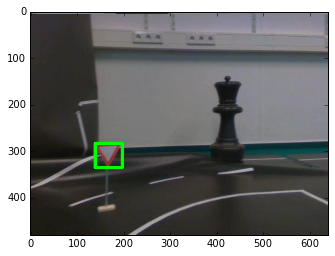

In [15]:
show_img(i)

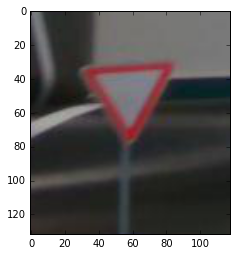

1
1


In [77]:
i = read_img("/Users/florian/traffic-signs-dataset/testing/test2.jpg")
candidate = i[283:355, 109:227]
show_img(candidate)
print len(detector2(candidate))
print len(detector2(i))

0